In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

**Import the libraries as well the nessosry functions**





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Import the data set file (ie dataset csv file)**

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

**Checking the data in the file**

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Checking Detail Analysis of the data set**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Checking Detail Analysis of the data set**

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Checking is there any null value in the data set**

In [7]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


**For K-Mean Clustering we use two cloumns
1:Annual Income
2:Spending Score**

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**Standarising the data set (Oftenly used for K-Mean Clustering)**

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Using Elbow Method**

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

**Graph for elbow method of the data set**

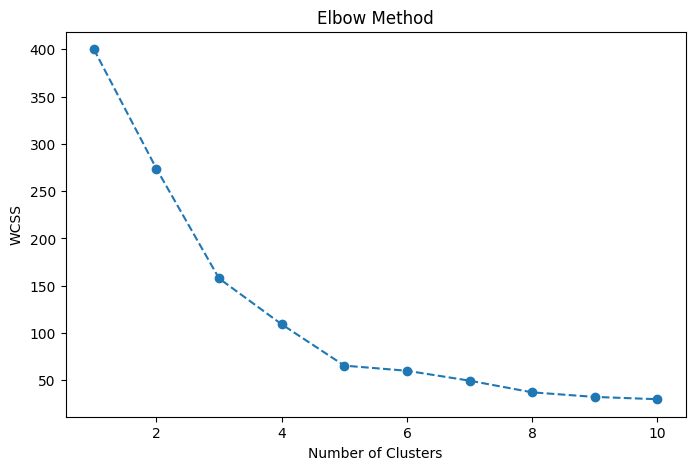

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-Means model with the optimal number of clusters (e.g., K=5):**

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

**Again Checking the data set with a new cluster column**

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


**Scatter plot of clusters:**

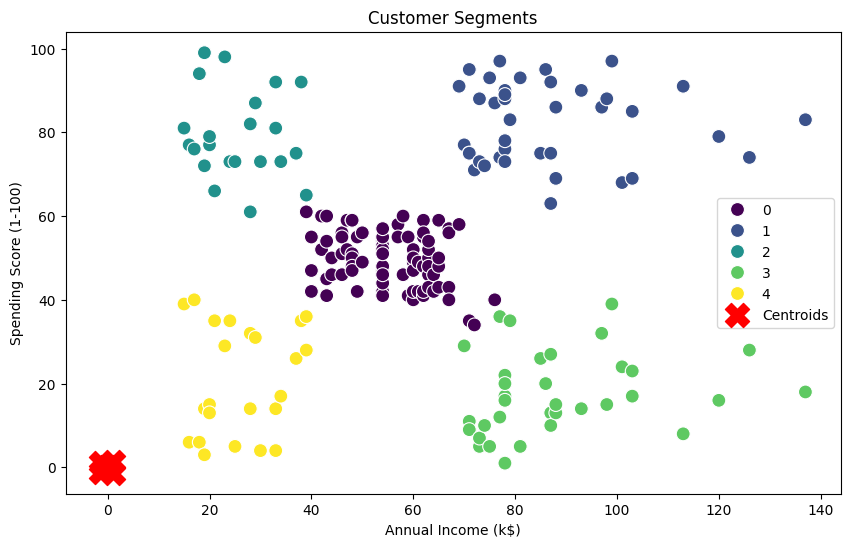

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Group the data by clusters and analyze the characteristics**

In [19]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


**Added a third feature (e.g., Age) and visualize clusters in 3D using Plotly.**

In [20]:
import plotly.express as px
fig = px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Cluster')
fig.show()